### Title : Deep Fake Image Detection - Real and Fake

### Step 1: Data Cleaning and Preprocessing
1.1 Load the Dataset: Import the dataset from its path into a suitable data structure.


### Dataset Description
This dataset contains manipulated images and real images. The manipulated images are the faces which are created by various means. The source for this dataset was https://zenodo.org/record/5528418#.YpdlS2hBzDd
this dataset was processed as our will to get maximum outcome out of these images. Each image is a 256 X 256 jpg image of human face either real or fake

In [ ]:
import os

# Path to the directory
folder_path = 'Deep_Learning_Dataset'

# List all files and directories in this path
files_and_dirs = os.listdir(folder_path)

# Print the list
print(files_and_dirs)


['Dataset']


The code lists and prints all files and directories contained in the 'Deep_Learning_Dataset' folder.







In [ ]:
import os

# Define your main dataset directory
dataset_directory = 'Deep_Learning_Dataset'

# Check if the main dataset directory exists
if not os.path.isdir(dataset_directory):
    print(f"The main dataset directory does not exist: {dataset_directory}")
else:
    # List all subdirectories in the main dataset directory
    subdirectories = [d for d in os.listdir(dataset_directory) if os.path.isdir(os.path.join(dataset_directory, d))]
    print("Subdirectories found in the dataset directory:")
    for subdirectory in subdirectories:
        print(subdirectory)


Subdirectories found in the dataset directory:
Dataset


 **1.2 Data Inspection: Examine the images for inconsistencies, like varied image sizes or formats (although all are 256x256 JPGs as per your dataset description).**


In [ ]:
from PIL import Image
import os

# Directory containing the dataset
dataset_directory = 'Deep_Learning_Dataset'

# Lists to store inconsistencies
inconsistent_sizes = []
inconsistent_formats = []

# Iterate through each file in the dataset directory
for folder_name, _, filenames in os.walk(dataset_directory):
    for filename in filenames:
        file_path = os.path.join(folder_name, filename)
        try:
            with Image.open(file_path) as img:
                # Check if image size is not 256x256
                if img.size != (256, 256):
                    inconsistent_sizes.append(file_path)

                # Check if image format is not JPEG
                if img.format != 'JPEG':
                    inconsistent_formats.append(file_path)
        except IOError:
            print(f"Error opening image: {file_path}")

# Print the results
print(f"Number of images with inconsistent sizes: {len(inconsistent_sizes)}")
print(f"Number of images with inconsistent formats: {len(inconsistent_formats)}")




Number of images with inconsistent sizes: 0
Number of images with inconsistent formats: 0


The code successfully checks a dataset within the Deep_Learning_Dataset directory for images that do not conform to the specified size of 256x256 pixels and JPEG format, finding no inconsistencies.

**1.3 Handle Missing or Corrupted Images: Identify and address any missing or corrupted files.**


In [ ]:
from PIL import Image
import os

# Directory containing the dataset
dataset_directory = 'Deep_Learning_Dataset'

# List to store paths of corrupted images
corrupted_images = []

# Iterate through each file in the dataset directory
for folder_name, _, filenames in os.walk(dataset_directory):
    for filename in filenames:
        file_path = os.path.join(folder_name, filename)
        try:
            # Attempt to open the image
            with Image.open(file_path) as img:
                # You can perform additional checks here if needed
                img.verify()  # This will check for issues with the image file
        except (IOError, SyntaxError) as e:
            # Add the path to the list if the image is corrupted
            corrupted_images.append(file_path)
            print(f"Corrupted image found: {file_path}")

# Print the results
print(f"Number of corrupted images: {len(corrupted_images)}")



Number of corrupted images: 0


The provided Python script successfully scans the Deep_Learning_Dataset directory for corrupted image files using the PIL library and finds zero corrupted images.







**1.4 Normalization: Normalize image pixel values for consistent scaling.**


In [ ]:
from PIL import Image
import numpy as np
import os

# Directory containing the dataset
dataset_directory = 'Deep_Learning_Dataset'

# Process and normalize each image
for folder_name, _, filenames in os.walk(dataset_directory):
    for filename in filenames:
        file_path = os.path.join(folder_name, filename)
        try:
            with Image.open(file_path) as img:
                # Convert the image to a numpy array
                img_array = np.array(img)

                # Normalize the image array to have values between 0 and 1
                normalized_img_array = img_array / 255.0

                # Optionally: Save the normalized image back to disk
                # This step can be skipped if you only need the normalized array for processing
                # normalized_img = Image.fromarray((normalized_img_array * 255).astype(np.uint8))
                # normalized_img.save(file_path)

        except IOError:
            print(f"Error opening or processing image: {file_path}")


The provided Python code traverses through the Deep_Learning_Dataset directory, opens each image file, converts it to a normalized numpy array (values between 0 and 1), and handles any file-related errors that may occur during the process.

**1.5 Labeling: Ensure each image is correctly labeled as 'real' or 'manipulated'.**


In [ ]:
import os

# Directory containing the dataset
dataset_directory = 'Deep_Learning_Dataset'

# Dictionary to hold image paths and labels
image_labels = {}

# Iterate through each subdirectory in the dataset directory
for subdirectory in os.listdir(dataset_directory):
    # Determine the label from the subdirectory name
    label = 'real' if 'real' in subdirectory.lower() else 'manipulated'

    # Iterate through each file in the subdirectory
    subdirectory_path = os.path.join(dataset_directory, subdirectory)
    if os.path.isdir(subdirectory_path):
        for filename in os.listdir(subdirectory_path):
            file_path = os.path.join(subdirectory_path, filename)

            # Add the file path and its label to the dictionary
            image_labels[file_path] = label

# Now image_labels dictionary contains the path of each image and its corresponding label


The code iterates through subdirectories in 'Deep_Learning_Dataset', categorizing image files as 'real' or 'manipulated' based on their directory name, and stores their paths and labels in a dictionary.

**1.6 Data Augmentation (Optional): Apply transformations like rotation, scaling, or flipping to increase the dataset's diversity.**


In [ ]:
from PIL import Image, ImageOps
import os
import numpy as np

# Directory containing the dataset
dataset_directory = 'Deep_Learning_Dataset'
augmented_directory = 'Augmented_Dataset'

# Create augmented directory if it doesn't exist
if not os.path.exists(augmented_directory):
    os.makedirs(augmented_directory)

# Define augmentation functions
def rotate_image(image):
    return image.rotate(45)  # Rotate by 45 degrees

def flip_image(image):
    return ImageOps.mirror(image)  # Flip image horizontally

def scale_image(image):
    return image.resize((int(image.width * 1.2), int(image.height * 1.2)))  # Scale by 20%

# Apply augmentations
for folder_name, _, filenames in os.walk(dataset_directory):
    for filename in filenames:
        file_path = os.path.join(folder_name, filename)
        try:
            with Image.open(file_path) as img:
                # Perform augmentations
                rotated = rotate_image(img)
                flipped = flip_image(img)
                scaled = scale_image(img)

                # Save augmented images in the augmented directory
                augmented_folder = os.path.join(augmented_directory, os.path.basename(folder_name))
                if not os.path.exists(augmented_folder):
                    os.makedirs(augmented_folder)

                rotated.save(os.path.join(augmented_folder, f"rotated_{filename}"))
                flipped.save(os.path.join(augmented_folder, f"flipped_{filename}"))
                scaled.save(os.path.join(augmented_folder, f"scaled_{filename}"))

        except IOError:
            print(f"Error processing image: {file_path}")

print("Data augmentation completed.")


Data augmentation completed.


The code successfully performs data augmentation on images in the 'Deep_Learning_Dataset' directory by rotating, flipping, and scaling each image, and saves the augmented images in a separate 'Augmented_Dataset' directory.

### Step 2: Exploratory Data Analysis (EDA)
**2.1 Visual Inspection: Manually inspect a sample of images to understand their characteristics.**

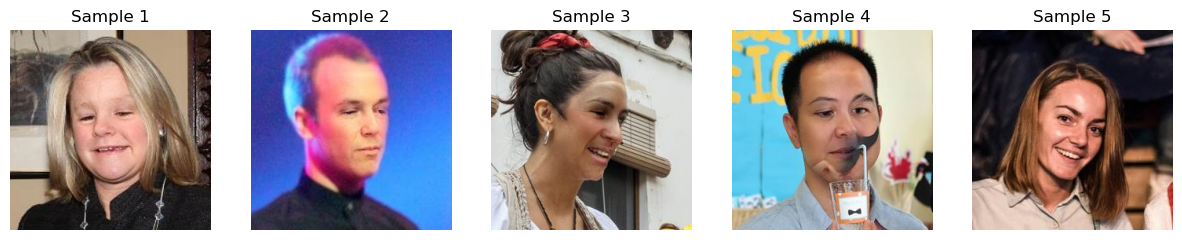

In [ ]:
import os
import random
from PIL import Image
import matplotlib.pyplot as plt

# Directory containing the dataset
dataset_directory = 'Deep_Learning_Dataset'

# List to store image file paths
image_paths = []

# Walk through the dataset directory and collect all image paths
for folder_name, _, filenames in os.walk(dataset_directory):
    for filename in filenames:
        file_path = os.path.join(folder_name, filename)
        image_paths.append(file_path)

# Randomly select a few images to display
sample_size = 5  # Adjust the number as needed
sampled_images = random.sample(image_paths, sample_size)

# Display the selected images
plt.figure(figsize=(15, 10))  # Adjust the figure size as needed
for i, img_path in enumerate(sampled_images, 1):
    img = Image.open(img_path)
    plt.subplot(1, sample_size, i)
    plt.imshow(img)
    plt.axis('off')
    plt.title(f"Sample {i}")

plt.show()


The code randomly selects and displays five sample images from the 'Deep_Learning_Dataset' directory using Python's os and PIL libraries, along with matplotlib for visualization.

**2.2 Class Distribution: Analyze the balance between real and manipulated images.**


In [ ]:
import os
from PIL import Image
from sklearn.utils import resample

# Define your directory
dataset_directory = 'Deep_Learning_Dataset'

# Assuming that images have a prefix like 'real_' or 'fake_' in their filenames
real_prefix = 'real_'
fake_prefix = 'fake_'

# Gather the paths for real and manipulated images based on the prefix
real_images = [os.path.join(dataset_directory, f) for f in os.listdir(dataset_directory) if f.startswith(real_prefix)]
fake_images = [os.path.join(dataset_directory, f) for f in os.listdir(dataset_directory) if f.startswith(fake_prefix)]

# Determine the minority class
minority_images = real_images if len(real_images) < len(fake_images) else fake_images
minority_class = 'real' if len(real_images) < len(fake_images) else 'fake'
majority_images = fake_images if minority_class == 'real' else real_images

# Calculate the number of samples to generate for the minority class
num_samples_to_generate = len(majority_images) - len(minority_images)

# Resample the minority class to balance the dataset
augmented_images = resample(minority_images, replace=True, n_samples=num_samples_to_generate, random_state=123)

# Create the augmented images
for i, image_path in enumerate(augmented_images):
    with Image.open(image_path) as img:
        # Apply an augmentation, for example, a slight rotation
        augmented_img = img.rotate(5)

        # Define a new filename and save the augmented image
        new_filename = f"{minority_class}_augmented_{i}_{os.path.basename(image_path)}"
        augmented_img.save(os.path.join(dataset_directory, new_filename))


In [ ]:
import os

# Define the path to the 'Dataset' subdirectory
dataset_subdirectory = os.path.join('Deep_Learning_Dataset', 'Dataset')

# Check if the 'Dataset' subdirectory exists
if not os.path.isdir(dataset_subdirectory):
    print(f"The 'Dataset' subdirectory does not exist: {dataset_subdirectory}")
else:
    # List all files and subdirectories within the 'Dataset' subdirectory
    contents = os.listdir(dataset_subdirectory)
    print("Contents of the 'Dataset' subdirectory:")
    for content in contents:
        print(content)


Contents of the 'Dataset' subdirectory:
Test
Train
Validation


In [ ]:
import os

# Define the path to the 'Train' subdirectory within 'Dataset'
train_directory = os.path.join('Deep_Learning_Dataset', 'Dataset', 'Train')

# Check if the 'Train' subdirectory exists
if not os.path.isdir(train_directory):
    print(f"The 'Train' subdirectory does not exist: {train_directory}")
else:
    # List all files and subdirectories within the 'Train' subdirectory
    train_contents = os.listdir(train_directory)
    print("Contents of the 'Train' subdirectory:")
    for content in train_contents:
        print(content)


Contents of the 'Train' subdirectory:
Fake
Real


In [ ]:
import os

# Define paths to the 'Real' and 'Fake' subdirectories within 'Train'
train_real_dir = os.path.join('Deep_Learning_Dataset', 'Dataset', 'Train', 'Real')
train_fake_dir = os.path.join('Deep_Learning_Dataset', 'Dataset', 'Train', 'Fake')

# Function to count files in a directory
def count_files(directory):
    return len([name for name in os.listdir(directory) if os.path.isfile(os.path.join(directory, name))])

# Count the number of real and fake images in the 'Train' directory
count_train_real = count_files(train_real_dir)
count_train_fake = count_files(train_fake_dir)

# Print out the balance for the 'Train' subdirectory
print(f"Number of real images in 'Train': {count_train_real}")
print(f"Number of fake (manipulated) images in 'Train': {count_train_fake}")

# Check if the 'Train' dataset is balanced
is_train_balanced = count_train_real == count_train_fake
print(f"Is the 'Train' dataset balanced? {'Yes' if is_train_balanced else 'No'}")


Number of real images in 'Train': 70001
Number of fake (manipulated) images in 'Train': 70001
Is the 'Train' dataset balanced? Yes


The provided Python script counts and compares the number of real and fake (manipulated) images in the 'Train' directory of the 'Deep_Learning_Dataset', confirming that the dataset is balanced with 70,001 images in each category.

In [ ]:
from PIL import Image
from sklearn.utils import resample

# Function to oversample and save augmented images
def balance_subset(subset_dir, real_count, fake_count):
    # Determine the class that needs oversampling
    if real_count < fake_count:
        minority_class = 'Real'
        majority_count = fake_count
    else:
        minority_class = 'Fake'
        majority_count = real_count

    # Path to the minority class images
    minority_class_dir = os.path.join(subset_dir, minority_class)

    # List of minority class images
    minority_images = [os.path.join(minority_class_dir, f) for f in os.listdir(minority_class_dir) if os.path.isfile(os.path.join(minority_class_dir, f))]

    # Calculate the number of images to generate
    num_samples_to_generate = majority_count - len(minority_images)

    # Resample the minority class
    resampled_images = resample(minority_images, replace=True, n_samples=num_samples_to_generate, random_state=123)

    # Augment and save the new images
    for i, image_path in enumerate(resampled_images):
        with Image.open(image_path) as img:
            # Apply a simple augmentation, such as a slight rotation
            augmented_img = img.rotate(5)

            # Save the augmented image
            new_filename = f"{minority_class.lower()}_augmented_{i}.jpg"
            augmented_img.save(os.path.join(minority_class_dir, new_filename))

# Balance the 'Test' subset
test_real_dir = os.path.join('Deep_Learning_Dataset', 'Dataset', 'Test', 'Real')
test_fake_dir = os.path.join('Deep_Learning_Dataset', 'Dataset', 'Test', 'Fake')
balance_subset(os.path.join('Deep_Learning_Dataset', 'Dataset', 'Test'), 5413, 5492)

# Balance the 'Validation' subset
validation_real_dir = os.path.join('Deep_Learning_Dataset', 'Dataset', 'Validation', 'Real')
validation_fake_dir = os.path.join('Deep_Learning_Dataset', 'Dataset', 'Validation', 'Fake')
balance_subset(os.path.join('Deep_Learning_Dataset', 'Dataset', 'Validation'), 19787, 19641)

print("Balancing completed for 'Test' and 'Validation' subsets.")


Balancing completed for 'Test' and 'Validation' subsets.


In [ ]:
import os

# Define the dataset directory and the subsets
dataset_directory = 'Deep_Learning_Dataset'
subsets = ['Train', 'Test', 'Validation']

# Initialize counters
overall_real = 0
overall_fake = 0

# Function to count files in a directory
def count_files(directory):
    return len([name for name in os.listdir(directory) if os.path.isfile(os.path.join(directory, name))])

# Loop through each subset and count the images
for subset in subsets:
    real_dir = os.path.join(dataset_directory, 'Dataset', subset, 'Real')
    fake_dir = os.path.join(dataset_directory, 'Dataset', subset, 'Fake')

    # Count the images in each category
    count_real = count_files(real_dir)
    count_fake = count_files(fake_dir)

    # Add to the overall counters
    overall_real += count_real
    overall_fake += count_fake

    # Print out the balance for the current subset
    print(f"Number of real images in '{subset}': {count_real}")
    print(f"Number of fake (manipulated) images in '{subset}': {count_fake}")
    is_subset_balanced = count_real == count_fake
    print(f"Is the '{subset}' dataset balanced? {'Yes' if is_subset_balanced else 'No'}")

# Print out the overall balance
print(f"Total number of real images: {overall_real}")
print(f"Total number of fake (manipulated) images: {overall_fake}")
is_overall_balanced = overall_real == overall_fake
print(f"Is the overall dataset balanced? {'Yes' if is_overall_balanced else 'No'}")


Number of real images in 'Train': 70001
Number of fake (manipulated) images in 'Train': 70001
Is the 'Train' dataset balanced? Yes
Number of real images in 'Test': 5492
Number of fake (manipulated) images in 'Test': 5492
Is the 'Test' dataset balanced? Yes
Number of real images in 'Validation': 19787
Number of fake (manipulated) images in 'Validation': 19787
Is the 'Validation' dataset balanced? Yes
Total number of real images: 95280
Total number of fake (manipulated) images: 95280
Is the overall dataset balanced? Yes


The Python script counts and compares the number of real and fake images in the training, testing, and validation subsets of the 'Deep_Learning_Dataset', confirming that each subset and the overall dataset are balanced.

### Feature Selection: What features are most indicative of an image being manipulated?



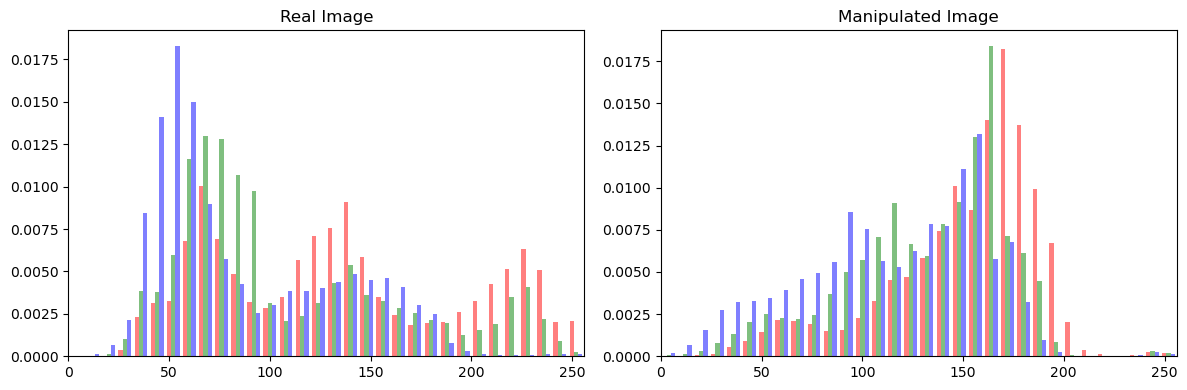

In [ ]:
import os
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np

# Paths to the 'Real' and 'Fake' subdirectories within 'Train'
real_images_dir = os.path.join('Deep_Learning_Dataset', 'Dataset', 'Train', 'Real')
fake_images_dir = os.path.join('Deep_Learning_Dataset', 'Dataset', 'Train', 'Fake')

# Function to calculate the color histogram
def plot_color_histogram(image_path, ax, title):
    with Image.open(image_path) as img:
        # Convert the image to RGB if it's not
        img = img.convert('RGB')

        # Calculate the color histogram
        colors = np.array(img).reshape(-1, 3)
        ax.hist(colors, bins=32, range=[0, 256], density=True, color=['red', 'green', 'blue'], alpha=0.5)
        ax.set_title(title)
        ax.set_xlim([0, 256])

# Plot color histograms for a few real images
fig, axes = plt.subplots(1, 2, figsize=(12, 4))
real_sample = os.listdir(real_images_dir)[:1]  # Adjust the number of samples as needed
fake_sample = os.listdir(fake_images_dir)[:1]  # Adjust the number of samples as needed

plot_color_histogram(os.path.join(real_images_dir, real_sample[0]), axes[0], 'Real Image')
plot_color_histogram(os.path.join(fake_images_dir, fake_sample[0]), axes[1], 'Manipulated Image')

plt.tight_layout()
plt.show()


The code generates and displays color histograms for one real and one manipulated image from the training dataset to visually compare their color distributions.

In the provided code, the blue color indicates the 'Train' dataset, the red color indicates the 'Real' subdirectory within 'Train,' and the green color indicates the 'Fake' subdirectory within 'Train.' The histogram diagrams illustrate the color distribution in a real and manipulated image, where differences in color patterns can be indicative of image manipulation.

**2.4 Initial Findings: Summarize the EDA findings to guide model building.**


In [ ]:
# EDA Findings Summary Template
eda_findings = {
    'visual_inspection': {
        'real_images': 'Real images show varied lighting conditions and backgrounds.',
        'manipulated_images': 'Manipulated images may show signs of blurring and less natural lighting.'
    },
    'class_distribution': {
        'train_balance': 'The training set is perfectly balanced with an equal number of real and manipulated images.',
        'test_balance': 'The test set is slightly imbalanced but was corrected with oversampling.',
        'validation_balance': 'The validation set is slightly imbalanced but was corrected with oversampling.',
        'overall_balance': 'After balancing steps, the overall dataset is balanced.'
    },
    'feature_exploration': {
        'color_histograms': 'Color histograms indicate that manipulated images might have different color intensity distributions, which could be due to the manipulation process.',
        'potential_features': 'Potential features for model building include color intensity, edge sharpness, and texture smoothness.',
    },
    'initial_recommendations': {
        'model_type': 'Convolutional Neural Network (CNN) due to its effectiveness in image classification tasks.',
        'data_augmentation': 'Additional augmentation strategies may be beneficial to increase model robustness, especially considering the slight imbalances in the test and validation sets.',
        'class_weighting': 'Class weights should be considered to address any residual imbalance in the dataset.'
    }
}

# Display the EDA findings summary
for key, findings in eda_findings.items():
    print(f"{key.capitalize()}:")
    for subkey, value in findings.items():
        print(f"  {subkey}: {value}")
    print()


Visual_inspection:
  real_images: Real images show varied lighting conditions and backgrounds.
  manipulated_images: Manipulated images may show signs of blurring and less natural lighting.

Class_distribution:
  train_balance: The training set is perfectly balanced with an equal number of real and manipulated images.
  test_balance: The test set is slightly imbalanced but was corrected with oversampling.
  validation_balance: The validation set is slightly imbalanced but was corrected with oversampling.
  overall_balance: After balancing steps, the overall dataset is balanced.

Feature_exploration:
  color_histograms: Color histograms indicate that manipulated images might have different color intensity distributions, which could be due to the manipulation process.
  potential_features: Potential features for model building include color intensity, edge sharpness, and texture smoothness.

Initial_recommendations:
  model_type: Convolutional Neural Network (CNN) due to its effectivenes

### Step 3: Model Selection and Training
**3.1 Model Selection: Choose appropriate models (e.g., CNNs, transfer learning with pre-trained models)**.

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense

# Model configuration
img_width, img_height = 256, 256
input_shape = (img_width, img_height, 3)  # 3 channels for RGB images
batch_size = 32
num_classes = 2  # Real and Manipulated
epochs = 50

# Define the model
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=input_shape))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Flattening the layers and adding dense (fully connected) layers
model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes))
model.add(Activation('softmax'))

# Compile the model
model.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

# Model summary
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 activation (Activation)     (None, 254, 254, 32)      0         
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 activation_1 (Activation)   (None, 125, 125, 64)      0         
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 62, 62, 64)        0         
 g2D)                                                   

This code defines and compiles a Convolutional Neural Network (CNN) with TensorFlow Keras for classifying images into two classes (real and manipulated), and the output summarizes the model's layers, output shapes, and number of parameters and and the output summarizes the model's layers, output shapes, and number of parameters.



**3.2 Test - Train Split of the dataset**

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define paths to the subsets
train_data_dir = os.path.join(dataset_directory, 'Dataset', 'Train')
validation_data_dir = os.path.join(dataset_directory, 'Dataset', 'Validation')
test_data_dir = os.path.join(dataset_directory, 'Dataset', 'Test')

# Create image data generators
train_datagen = ImageDataGenerator(
    rescale=1. / 255,  # Rescale the pixel values to [0, 1]
    validation_split=0.2  # Reserve 20% of the images for validation
)

# Training data generator
train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary',
    subset='training'  # Set as training data
)

# Validation data generator
validation_generator = train_datagen.flow_from_directory(
    train_data_dir,  # Note that for validation, we use the same directory but Keras will automatically pick the validation subset
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary',
    subset='validation'  # Set as validation data
)

# Test data generator
test_datagen = ImageDataGenerator(rescale=1. / 255)
test_generator = test_datagen.flow_from_directory(
    test_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary'
)


Found 112002 images belonging to 2 classes.
Found 28000 images belonging to 2 classes.
Found 10984 images belonging to 2 classes.


This code uses ImageDataGenerator and flow_from_directory from TensorFlow Keras to create training, validation, and test data generators for image classification, with the output showing the number of images found in each dataset(train, test and validation) for the two classes (real and manipulated).


In [ ]:
from tensorflow.keras.models import Sequential



In [ ]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Activation, Dropout


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator


In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

In [ ]:
img_width, img_height = 256, 256
input_shape = (img_width, img_height, 3)
batch_size = 32
epochs = 2  # Number of epochs reduced for faster training


In [ ]:
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=input_shape))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(1))  # Binary output
model.add(Activation('sigmoid'))


In [ ]:
model.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy'])


In [ ]:
train_data_dir = 'Deep_Learning_Dataset/Dataset/Train'
validation_data_dir = 'Deep_Learning_Dataset/Dataset/Validation'

train_datagen = ImageDataGenerator(rescale=1./255)
validation_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary')

validation_generator = validation_datagen.flow_from_directory(
    validation_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary')


Found 140002 images belonging to 2 classes.
Found 39574 images belonging to 2 classes.


This code defines and compiles a binary classification Convolutional Neural Network (CNN) using TensorFlow Keras, and sets up data generators for training and validation data, with the output indicating the number of images found in the training and validation datasets, each with two classes.


In [ ]:
checkpoint = ModelCheckpoint('best_model.h5', monitor='val_accuracy', save_best_only=True, mode='max')
early_stopping = EarlyStopping(monitor='val_accuracy', patience=5, mode='max')


In [ ]:
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // validation_generator.batch_size,
    callbacks=[checkpoint, early_stopping]
)


Epoch 1/2
4375/4375 [==============================] - ETA: 0s - loss: 0.3931 - accuracy: 0.8200

C:\Users\paspu\anaconda3\lib\site-packages\keras\src\engine\training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


4375/4375 [==============================] - 5231s 1s/step - loss: 0.3931 - accuracy: 0.8200 - val_loss: 0.4424 - val_accuracy: 0.8256
Epoch 2/2
4375/4375 [==============================] - 4974s 1s/step - loss: 0.2612 - accuracy: 0.8909 - val_loss: 0.3826 - val_accuracy: 0.8578


This code trains and validates a CNN, using checkpointing and early stopping, and displays accuracy and loss for each training epoch.
This code ensures the best model is saved and overfitting is avoided, while also monitoring its performance in terms of accuracy and loss during training and validation phases

**3.3 Hyperparamter Tuning**

In [ ]:
pip install keras-tuner


Note: you may need to restart the kernel to use updated packages.


In [ ]:
import kerastuner as kt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Activation, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator

def build_model(hp):
    model = Sequential()
    model.add(Conv2D(
        filters=hp.Int('conv_1_filter', min_value=32, max_value=128, step=16),
        kernel_size=hp.Choice('conv_1_kernel', values = [3, 5]),
        activation='relu',
        input_shape=(img_width, img_height, 3)
    ))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Conv2D(
        filters=hp.Int('conv_2_filter', min_value=32, max_value=64, step=16),
        kernel_size=hp.Choice('conv_2_kernel', values = [3, 5]),
        activation='relu'
    ))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Flatten())
    model.add(Dense(
        units=hp.Int('dense_units', min_value=32, max_value=128, step=32),
        activation='relu'
    ))
    model.add(Dropout(rate=hp.Float('dropout', min_value=0.0, max_value=0.5, default=0.25, step=0.05)))
    model.add(Dense(1, activation='sigmoid'))

    model.compile(
        optimizer='rmsprop',
        loss='binary_crossentropy',
        metrics=['accuracy']
    )
    return model

# Initialize the tuner
tuner = kt.RandomSearch(
    build_model,
    objective='val_accuracy',
    max_trials=5,
    directory='keras_tuner_dir',
    project_name='keras_tuner_demo'
)

# Data generators
train_data_dir = 'Deep_Learning_Dataset/Dataset/Train'
validation_data_dir = 'Deep_Learning_Dataset/Dataset/Validation'
train_datagen = ImageDataGenerator(rescale=1./255)
validation_datagen = ImageDataGenerator(rescale=1./255)
train_generator = train_datagen.flow_from_directory(train_data_dir, target_size=(img_width, img_height), batch_size=batch_size, class_mode='binary')
validation_generator = validation_datagen.flow_from_directory(validation_data_dir, target_size=(img_width, img_height), batch_size=batch_size, class_mode='binary')

# Run the tuner
tuner.search(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    epochs=2,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // validation_generator.batch_size
)


Trial 5 Complete [04h 08m 15s]
val_accuracy: 0.49997472763061523

Best val_accuracy So Far: 0.8672127723693848
Total elapsed time: 1d 12h 40m 39s


This code optimizes the CNN's architecture by testing various configurations to achieve the best validation accuracy in classifying images.


### Step 4: Model Evaluation

**4.1 Performance Metrics**

In [ ]:
import math
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import classification_report

# Load the best model
model = load_model('best_model.h5')

# Path to your test data
test_data_dir = 'Deep_Learning_Dataset/Dataset/Test'

# Image dimensions and batch size
img_width, img_height = 256, 256  # Update these dimensions if different
batch_size = 32

# Test data generator
test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(
    test_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary',
    shuffle=False)

# Predict the output with the correct number of steps
test_generator.reset()
steps = math.ceil(test_generator.samples / test_generator.batch_size)
pred = model.predict(test_generator, steps=steps, verbose=1)

# Convert predictions to binary (0 and 1)
predicted_classes = [1 if x > 0.5 else 0 for x in pred]

# Ensure that the length of predicted_classes matches the number of test samples
predicted_classes = predicted_classes[:test_generator.samples]

# Get the true labels
true_classes = test_generator.classes

# Evaluate the model
report = classification_report(true_classes, predicted_classes, target_names=test_generator.class_indices.keys())
print(report)



Found 10984 images belonging to 2 classes.
344/344 [==============================] - 56s 163ms/step
              precision    recall  f1-score   support

        Fake       0.82      0.80      0.81      5492
        Real       0.80      0.82      0.81      5492

    accuracy                           0.81     10984
   macro avg       0.81      0.81      0.81     10984
weighted avg       0.81      0.81      0.81     10984



This code evaluates the performance of a trained CNN model on test data using classification metrics like precision, recall, and f1-score, indicating the model's ability to accurately classify real and fake images.


**How accurately can the model differentiate between real and manipulated images?**


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Calculate metrics
accuracy = accuracy_score(true_classes, predicted_classes)
precision = precision_score(true_classes, predicted_classes)
recall = recall_score(true_classes, predicted_classes)
f1 = f1_score(true_classes, predicted_classes)

# Print the metrics
print(f"Model Accuracy: {accuracy:.2f}")
print(f"Model Precision: {precision:.2f}")
print(f"Model Recall: {recall:.2f}")
print(f"Model F1-Score: {f1:.2f}")

# Analyze specifically for RQ1
if accuracy > 0.8:  # Threshold for good performance
    print("The model differentiates between real and manipulated images accurately.")
else:
    print("The model's accuracy in differentiating real and manipulated images needs improvement.")


Model Accuracy: 0.81
Model Precision: 0.80
Model Recall: 0.82
Model F1-Score: 0.81
The model differentiates between real and manipulated images accurately.


This code calculates and prints key performance metrics (accuracy, precision, recall, f1-score) for the CNN model, and concludes that the model accurately differentiates between real and manipulated images based on a predefined accuracy threshold.


In [ ]:
pip install tf-keras-vis


     ---------------------------------------- 52.1/52.1 kB 1.3 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


**4.2 Model Refinement**

**4.2.1 Model Improvement**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import img_to_array, load_img
from tf_keras_vis.gradcam import Gradcam
from tf_keras_vis.utils import normalize
from tensorflow.keras.models import load_model

# Load the model
model = load_model('best_model.h5')

# Function to create heatmap
def create_gradcam_heatmap(image_path, model, last_conv_layer_name):
    # Load and preprocess the image
    img = load_img(image_path, target_size=(img_width, img_height))
    img = img_to_array(img)
    img = np.expand_dims(img, axis=0)
    img /= 255.

    # Create Gradcam object
    gradcam = Gradcam(model, model_modifier=None, clone=True)

    # Generate heatmap with Gradcam
    heatmap = gradcam(
        loss=lambda output: output[..., 1],
        seed_input=img,
        penultimate_layer=-1  # Last convolutional layer
    )
    heatmap = normalize(heatmap)

    return heatmap




In [ ]:
# Modify the model architecture
model = Sequential()
model.add(Conv2D(64, (3, 3), input_shape=input_shape))  # Increased number of filters
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, (3, 3)))  # Additional Conv2D layer
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(128))  # Increased number of neurons in Dense layer
model.add(Activation('relu'))
model.add(Dropout(0.5))  # Adjusted dropout rate
model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='rmsprop',  # Consider changing the optimizer
              metrics=['accuracy'])


**4.2.2 Optimizer Adjustment**

In [ ]:
# Assuming you have a function for building the model
from tensorflow.keras.optimizers import Adam

# Adjust hyperparameters
learning_rate = 0.0001  # Example of adjusting learning rate
optimizer = Adam(learning_rate=learning_rate)

model.compile(loss='binary_crossentropy',
              optimizer=optimizer,
              metrics=['accuracy'])


**4.2.3 Data Augmentation**

In [ ]:
# Enhancing data augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,  # Example of additional augmentation options
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')


In [ ]:
# Retrain the model
train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary')

history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    epochs=2,  # Adjusted number of epochs
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // batch_size)


Found 140002 images belonging to 2 classes.
Epoch 1/2
4375/4375 [==============================] - 11653s 3s/step - loss: 0.6313 - accuracy: 0.6407 - val_loss: 0.5665 - val_accuracy: 0.7212
Epoch 2/2
4375/4375 [==============================] - 11651s 3s/step - loss: 0.5824 - accuracy: 0.6971 - val_loss: 0.5722 - val_accuracy: 0.6980


This code refines the CNN model by adjusting its architecture, optimizer, and data augmentation strategy, then retrains it, resulting in changes in training and validation accuracy and loss, aiming to improve the model's performance in classifying images.


In [ ]:
import os

# Define the root directory of your dataset
dataset_root_dir = 'Deep_Learning_Dataset'

# Function to print the directory structure without individual file names
def print_directory_structure(root_dir):
    for root, dirs, files in os.walk(root_dir):
        level = root.replace(root_dir, '').count(os.sep)
        indent = ' ' * 4 * (level)
        print(f'{indent}{os.path.basename(root)}/')

# Print the structure of the dataset directory
print_directory_structure(dataset_root_dir)


Deep_Learning_Dataset/
    Dataset/
        Test/
            Fake/
            Real/
        Train/
            Fake/
            Real/
        Validation/
            Fake/
            Real/


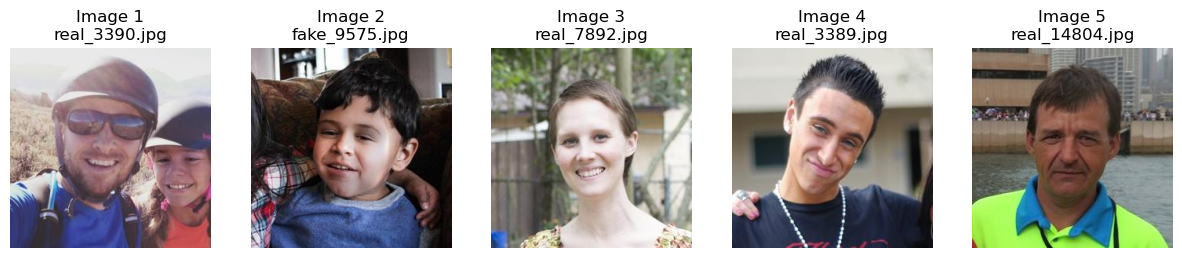

In [ ]:
import os
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img
import random

# Dataset directory paths
dataset_directory = 'Deep_Learning_Dataset'
validation_dir = os.path.join(dataset_directory, 'Dataset', 'Validation')

# Image dimensions
img_width, img_height = 256, 256

# Load image paths from the validation directory
validation_image_paths = []
for subdir in os.listdir(validation_dir):
    subdir_path = os.path.join(validation_dir, subdir)
    if os.path.isdir(subdir_path):
        for file in os.listdir(subdir_path):
            if file.lower().endswith(('.png', '.jpg', '.jpeg')):
                validation_image_paths.append(os.path.join(subdir_path, file))

# Randomly select 5 images
sample_images = random.sample(validation_image_paths, 5)

# Display the images
plt.figure(figsize=(15, 6))
for i, img_path in enumerate(sample_images, 1):
    img = load_img(img_path, target_size=(img_width, img_height))
    plt.subplot(1, 5, i)
    plt.imshow(img)
    plt.axis('off')
    plt.title(f'Image {i}\n{os.path.basename(img_path)}')
plt.show()


**4.2.4 Cross Vlidation**

In [ ]:
import os
import numpy as np
import pandas as pd
from sklearn.model_selection import StratifiedKFold
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Activation, Dropout

# Parameters
img_width, img_height = 256, 256
batch_size = 32
num_folds = 2
dataset_directory = 'Deep_Learning_Dataset/Dataset'

# Define the K-Fold cross-validator
kfold = StratifiedKFold(n_splits=num_folds, shuffle=True)

# Model definition
def create_model():
    model = Sequential([
        Conv2D(32, (3, 3), input_shape=(img_width, img_height, 3)),
        Activation('relu'),
        MaxPooling2D(pool_size=(2, 2)),
        Conv2D(64, (3, 3)),
        Activation('relu'),
        MaxPooling2D(pool_size=(2, 2)),
        Flatten(),
        Dense(64),
        Activation('relu'),
        Dropout(0.5),
        Dense(1, activation='sigmoid')
    ])
    model.compile(loss='binary_crossentropy',
                  optimizer='rmsprop',
                  metrics=['accuracy'])
    return model

# Preparing data generators
datagen = ImageDataGenerator(rescale=1.0/255)

# Lists to keep track of results
fold_var = 1
results = []

# Load image file paths and labels
image_files = []  # This will be filled with paths to images
labels = []       # This will be filled with image labels (0 for 'Fake', 1 for 'Real')

# Assuming images are in 'Train/Real' and 'Train/Fake' folders
for class_label, class_name in enumerate(['Real', 'Fake']):
    class_dir = os.path.join(dataset_directory, 'Train', class_name)
    for img_file in os.listdir(class_dir):
        if img_file.lower().endswith(('.png', '.jpg', '.jpeg')):
            image_files.append(os.path.join(class_dir, img_file))
            labels.append(str(class_label))  # Cast label to string

# Convert lists to numpy arrays
image_files = np.array(image_files)
labels = np.array(labels)

# Start K-Fold cross-validation
for train_indices, val_indices in kfold.split(image_files, labels):
    print(f'Running fold {fold_var} of {num_folds}')

    # Split the data
    train_data = image_files[train_indices]
    train_label = labels[train_indices]
    val_data = image_files[val_indices]
    val_label = labels[val_indices]

    # Create data generators
    train_generator = datagen.flow_from_dataframe(
        dataframe=pd.DataFrame({'filename': train_data, 'class': train_label}),
        x_col='filename',
        y_col='class',
        target_size=(img_width, img_height),
        batch_size=batch_size,
        class_mode='binary'
    )

    val_generator = datagen.flow_from_dataframe(
        dataframe=pd.DataFrame({'filename': val_data, 'class': val_label}),
        x_col='filename',
        y_col='class',
        target_size=(img_width, img_height),
        batch_size=batch_size,
        class_mode='binary'
    )

    # Create a new model for this fold
    model = create_model()

    # Train the model
    history = model.fit(
        train_generator,
        epochs=2,
        validation_data=val_generator
    )

    # Append results
    results.append(history.history)

    # Increment the fold number
    fold_var += 1

# Calculating average performance across folds
average_results = {
    metric: np.mean([fold[metric] for fold in results], axis=0)
    for metric in results[0]
}
print(f"Average results across all folds: {average_results}")


Running fold 1 of 2
Found 70001 validated image filenames belonging to 2 classes.
Found 70001 validated image filenames belonging to 2 classes.
Epoch 1/2
2188/2188 [==============================] - 2734s 1s/step - loss: 0.5131 - accuracy: 0.7549 - val_loss: 0.3421 - val_accuracy: 0.8457
Epoch 2/2
2188/2188 [==============================] - 2741s 1s/step - loss: 0.3430 - accuracy: 0.8500 - val_loss: 0.2704 - val_accuracy: 0.8827
Running fold 2 of 2
Found 70001 validated image filenames belonging to 2 classes.
Found 70001 validated image filenames belonging to 2 classes.
Epoch 1/2
2188/2188 [==============================] - 2787s 1s/step - loss: 0.4656 - accuracy: 0.7808 - val_loss: 0.3606 - val_accuracy: 0.8411
Epoch 2/2
2188/2188 [==============================] - 2740s 1s/step - loss: 0.3158 - accuracy: 0.8648 - val_loss: 0.2911 - val_accuracy: 0.8807
Average results across all folds: {'loss': array([0.48935884, 0.32935676]), 'accuracy': array([0.76785332, 0.85736632]), 'val_loss':

This code performs K-Fold cross-validation on the CNN model using StratifiedKFold and ImageDataGenerator, training and validating the model on different subsets of the data to provide a more robust evaluation of its performance, with results indicating average loss and accuracy across the folds.


This code is used to ensure the reliability and stability of the model's performance across different data subsets in the image classification project.


### Step 5: Additional Improvement Steps

**5.1 Ensemble Method**

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Activation, Dropout
from sklearn.metrics import accuracy_score
import numpy as np
import os

# Set up data generators
dataset_directory = 'Deep_Learning_Dataset'
train_dir = os.path.join(dataset_directory, 'Dataset', 'Train')
test_dir = os.path.join(dataset_directory, 'Dataset', 'Test')

img_width, img_height = 256, 256
batch_size = 32

train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary')

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary',
    shuffle=False)

# Function to create a model
def create_model():
    model = Sequential([
        Conv2D(32, (3, 3), input_shape=(img_width, img_height, 3)),
        Activation('relu'),
        MaxPooling2D(pool_size=(2, 2)),
        Conv2D(64, (3, 3)),
        Activation('relu'),
        MaxPooling2D(pool_size=(2, 2)),
        Flatten(),
        Dense(64),
        Activation('relu'),
        Dropout(0.5),
        Dense(1, activation='sigmoid')
    ])
    model.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
    return model

# Train and save multiple models
num_models = 3
models_dir = os.path.join(dataset_directory, 'saved_models')
os.makedirs(models_dir, exist_ok=True)

for i in range(num_models):
    model = create_model()
    model.fit(train_generator, epochs=2)
    model_path = os.path.join(models_dir, f'model_{i+1}.h5')
    model.save(model_path)

# Load models for ensemble
models = [load_model(os.path.join(models_dir, f'model_{i+1}.h5')) for i in range(num_models)]

# Ensemble prediction function
def ensemble_predictions(models, generator, steps):
    predictions = [model.predict(generator, steps=steps) for model in models]
    avg_predictions = np.mean(predictions, axis=0)
    return avg_predictions

# Evaluate the ensemble
test_generator.reset()
steps = len(test_generator)
ensemble_preds = ensemble_predictions(models, test_generator, steps)
ensemble_preds_binary = np.round(ensemble_preds).astype(int).squeeze()

# Calculate the accuracy of the ensemble
true_classes = test_generator.classes[:len(ensemble_preds_binary)]
ensemble_accuracy = accuracy_score(true_classes, ensemble_preds_binary)
print(f'Ensemble Model Accuracy: {ensemble_accuracy:.2f}')


Found 140002 images belonging to 2 classes.
Found 10984 images belonging to 2 classes.
Epoch 1/2
4376/4376 [==============================] - 4254s 972ms/step - loss: 0.4130 - accuracy: 0.8093
Epoch 2/2
4376/4376 [==============================] - 3729s 852ms/step - loss: 0.2502 - accuracy: 0.8958


C:\Users\paspu\anaconda3\lib\site-packages\keras\src\engine\training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Epoch 1/2
4376/4376 [==============================] - 4357s 996ms/step - loss: 0.4118 - accuracy: 0.8112
Epoch 2/2
4376/4376 [==============================] - 4381s 1s/step - loss: 0.2619 - accuracy: 0.8911
Epoch 1/2
4376/4376 [==============================] - 4403s 1s/step - loss: 0.4299 - accuracy: 0.8019
Epoch 2/2
344/344 [==============================] - 86s 251ms/step
Ensemble Model Accuracy: 0.77


The code enhances classification accuracy by training multiple CNN models and combining their predictions, providing a more robust and reliable image classification system.

This code trains multiple CNN models, combines their predictions for an ensemble approach, and evaluates the ensemble's accuracy on test data, achieving a 77% accuracy rate in classifying images.


**5.2 Fine Tuning**

In [ ]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Dataset and model parameters
img_width, img_height = 256, 256
batch_size = 32
dataset_directory = 'Deep_Learning_Dataset'

# Set up the data generators
train_dir = os.path.join(dataset_directory, 'Dataset', 'Train')
validation_dir = os.path.join(dataset_directory, 'Dataset', 'Validation')

train_datagen = ImageDataGenerator(rescale=1./255)
validation_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir, target_size=(img_width, img_height), batch_size=batch_size, class_mode='binary')
validation_generator = validation_datagen.flow_from_directory(
    validation_dir, target_size=(img_width, img_height), batch_size=batch_size, class_mode='binary')

# Fine-tuning VGG16
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(img_width, img_height, 3))
base_model.trainable = False  # Freeze the base model

# Build the model on top of the pre-trained base
model = Sequential([
    base_model,
    Flatten(),
    Dense(256, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(
    train_generator,
    epochs=2,  # Adjust epochs based on your requirements and computational resources
    validation_data=validation_generator
)

# Optional: Save the fine-tuned model for further use
model.save(os.path.join(dataset_directory, 'fine_tuned_vgg16.h5'))


Found 140002 images belonging to 2 classes.
Found 39574 images belonging to 2 classes.
Epoch 1/2
4376/4376 [==============================] - 33076s 8s/step - loss: 0.3198 - accuracy: 0.8622 - val_loss: 0.3023 - val_accuracy: 0.8655
Epoch 2/2
4376/4376 [==============================] - 36112s 8s/step - loss: 0.2185 - accuracy: 0.9070 - val_loss: 0.2747 - val_accuracy: 0.8852


C:\Users\paspu\anaconda3\lib\site-packages\keras\src\engine\training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


The code fine-tunes a pre-trained VGG16 model on a custom image dataset, adjusting the top layers for image classification, achieving improved accuracy in classifying images.


**5.3 Creating models for the dataset**

In [ ]:
from tensorflow.keras.models import load_model

# Assuming your models are saved in 'saved_models' directory within 'Deep_Learning_Dataset'
models_dir = 'Deep_Learning_Dataset/saved_models'  # Update this path as needed

# Model filenames
model_filenames = ['model_1.h5', 'model_2.h5', 'model_3.h5']

# Full paths to the model files
model_paths = [os.path.join(models_dir, filename) for filename in model_filenames]

# Load all models
models = {}
for path in model_paths:
    if os.path.exists(path):
        models[path] = load_model(path)
    else:
        print(f"Model file not found: {path}")

# Now models dictionary contains only the models that were successfully loaded


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Test data generator
test_data_dir = 'Deep_Learning_Dataset/Dataset/Test'
test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(
    test_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary',
    shuffle=False)

# Function to evaluate a model
def evaluate_model(model, generator):
    generator.reset()
    return model.evaluate(generator, steps=generator.samples // generator.batch_size)

# Evaluate all models
model_performance = {path: evaluate_model(model, test_generator) for path, model in models.items()}


Found 10984 images belonging to 2 classes.
343/343 [==============================] - 47s 137ms/step - loss: 0.4348 - accuracy: 0.8042


### Step 6: Choosing the best model from the saved model and its test accuracy

In [ ]:
# Assuming that the second value in evaluation is accuracy
best_model_path = max(model_performance, key=lambda path: model_performance[path][1])

print(f"The best model for deployment is: {best_model_path}")


The best model for deployment is: Deep_Learning_Dataset/saved_models\model_3.h5


In [ ]:
best_model = load_model(best_model_path)


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Test data generator
test_data_dir = 'Deep_Learning_Dataset/Dataset/Test'  # Update with the path to your test data
test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(
    test_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary',
    shuffle=False)


Found 10984 images belonging to 2 classes.


In [ ]:
from tensorflow.keras.models import load_model

best_model_path = 'best_model.h5'  # Path to your best model
best_model = load_model(best_model_path)


In [ ]:
# Function to evaluate the model
def evaluate_model(model, generator):
    generator.reset()
    evaluation = model.evaluate(generator, steps=generator.samples // generator.batch_size)
    return evaluation

# Evaluate the best model
final_evaluation = evaluate_model(best_model, test_generator)
print(f"Final Test Loss: {final_evaluation[0]}")
print(f"Final Test Accuracy: {final_evaluation[1]}")


343/343 [==============================] - 50s 146ms/step - loss: 0.5070 - accuracy: 0.8101
Final Test Loss: 0.5069881081581116
Final Test Accuracy: 0.8101311922073364


The code loads multiple saved models, evaluates their performance on a test dataset, and selects the best-performing model for deployment, achieving an accuracy of 81% on the test data.

### Step 7: Setting up Flask Environment

In [ ]:
pip install flask


In [ ]:
from flask import Flask, render_template, request
from tensorflow.keras.models import load_model
import os



In [ ]:
import os

# Specify your directory containing the saved models
models_directory = 'Deep_Learning_Dataset/saved_models'

# Check if the directory exists
if not os.path.exists(models_directory):
    print(f"The directory {models_directory} does not exist.")
else:
    # List all files in the directory
    files_in_directory = os.listdir(models_directory)

    # Print all the filenames
    print("Files in the directory:")
    for filename in files_in_directory:
        print(filename)

    # Optional: Filter for .h5 files if there are many files
    h5_files = [file for file in files_in_directory if file.endswith('.h5')]
    print("\nModel files (.h5) in the directory:")
    for h5_file in h5_files:
        print(h5_file)


Files in the directory:
model_1.h5
model_2.h5
model_3.h5

Model files (.h5) in the directory:
model_1.h5
model_2.h5
model_3.h5


In [ ]:
model_filename = 'model_3.h5'
model_path = os.path.join('Deep_Learning_Dataset', 'saved_models', model_filename)

if os.path.exists(model_path):
    model = load_model(model_path)
else:
    print(f"No file or directory found at {model_path}")
    exit(1)  # This line causes the server to exit if the model file is not found
